<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [14]:
import pandas as pd

In [15]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv') # เพื่อดึงข้อมูลจากในเน็ตเข้า
BFI_data.head() # A2 A3 เป็นเเบบสอบถามทางจิตวิทยา NaN คือไม่ได้กรอกมา

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


#Factor aAnalysis'
Assumptions : \
ในข้อมูล mutilative ที่มีตัวแปร Ocserve varible จำนวน n ตัว\
มีตัวแปร Favctor (Larent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ \
โดย k<n

Assumptions ในการทำ Factor Analysis:\

There are no outlier in data. ต้องไม่มีเอาท์ไลน์เออร์\
Sample size should be greater than the factor. จำนวนdata ควรมากกว่า จำนวน factor\
There should not be perfect multicollinearity. ต้องไม่มี multicollinearity คือ data ที่มาจากsource เดียวกัน
There should not be homoskedasticitybetween the variables. ต้องไม่มี homoskedasticity


**การทำ Factor Analysis**

In [25]:
import factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt # พร็อตกราฟ

SyntaxError: ignored

In [26]:

เเก้ error

ModuleNotFoundError

SyntaxError: ignored

In [ ]:
วิธี install package อื่นๆ

In [18]:

!pip install factor_analyzer

     |████████████████████████████████| 40kB 4.3MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=59026e8227e19d79c7810eb0c328d3760cc384537504423aadaa9b803543db70
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [22]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt # = from matplotlib import pyplot as plt


#Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...o3,o4,o5 ด้วยคำสั่ง .iloc[]

In [13]:
BFI_data_dropped = BFI_data.iloc[:,1:26] # เอาทุกเเถวเลยไม่เอาคอลัมน์เเรกเเละสามคอลัมน์สุดท้าย
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [31]:
BFI_data_dropped = BFI_data_dropped.dropna() # ดร็อปตัวที่เขาไม่ตอบ/กรอก ออก
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [33]:
BFI_data_dropped.shape #ดูขนาด

(2436, 25)

## Bartlett’s test 

In [32]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# import ฟังก์ชันมา
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value # ถ้ามีค่าเป็น 1 ไม่สามารถใช้ได้

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

#Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 เเปลวา่ข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [36]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model # ถ้าน้อยกว่า 0.6 เเปลว่า data ไม่เหมาะสม

0.8485397221949221

## Factor Analysis

In [37]:
from factor_analyzer import FactorAnalyzer

## Define

In [41]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [42]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [40]:
data_fa.shape

(2436, 20)

## วิธีตัดสินว่าเราจะลดเหลือกี่ dimesion (มี factor ทั้งหมดกี่ตัว)

In [43]:
ev,v = fa.get_eigenvalues() # คำนวนหา eigen value

### ใช้ eigen values 

In [44]:
ev


array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

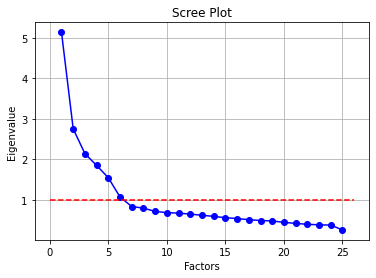

In [45]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()  ## eigen values มีค่าเกิน 1 เเปลว่า factors ใช้อธิบายข้อมูลได้ เหตุผล เพราะอาจจะมีจำนวนข้อมูลที่เยอะเเล้วดูยาก

In [47]:
data_fa[:,:4]  #เอาตั้งเเต่ 0-4

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311]])

## Factor loading

In [48]:
fa.loadings_.shape # 25 ตัวเเปร factor ที่คำนวณ 20 มีอิทธิพลมากน้อยเเค่ไหน

(25, 20)